In [ ]:
import typing as t

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def objective_function(x: np.ndarray):
  t1 = np.float64(20.0) * np.e ** (np.float64(-0.2) * np.sqrt(np.mean(x ** np.float64(2.0))))
  t2 = np.e ** np.mean(np.cos(np.float64(2) * np.pi * x))
  return -t1 - t2 + 20 + np.e

In [ ]:
points = np.sort(np.random.uniform(low=-50, high=50, size=100))

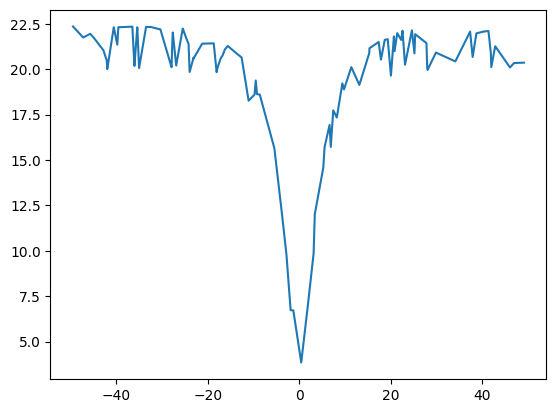

In [ ]:
Y = [ objective_function(np.array([ i ])) for i in points ]

_ = plt.plot(points, Y)

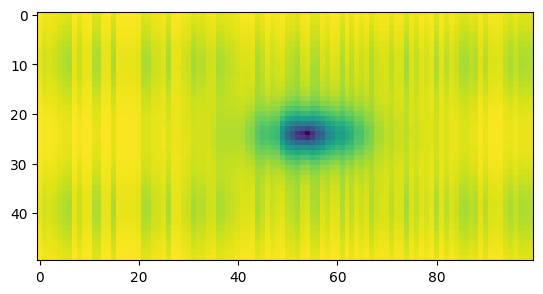

In [ ]:
Y = [ [ objective_function(np.array([ i, j ])) for i in points ] for j in np.linspace(-49.33, 50.33) ]

_ = plt.imshow(Y)

['0' '1' '1' '1' '1' '1' '0' '1' '1' '1' '1' '1'] -11.84340878809447


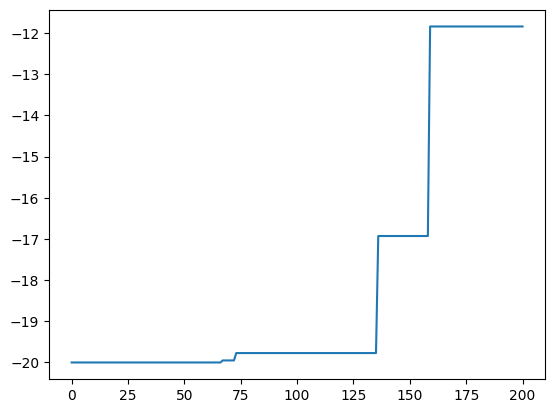

In [115]:
class GeneticAlgorithm(object):

  def __init__(self, xmin: np.float64, xmax: np.float64, dim: np.int64, objective_function: t.Callable[[ np.ndarray ], np.float64]):
    self.xmin = xmin
    self.xmax = xmax
    self.dim = dim
    self.objective_function = objective_function

  def solve(self, population_sz: np.int64, n_epochs: np.int64, mutation_rate: np.float64) -> t.Tuple[np.ndarray, np.float64, list[np.float64]]:
    history = list()

    population = np.array([ np.random.choice(['0', '1'], size=6 * self.dim) for _ in range(population_sz) ])

    for i in range(n_epochs):
      fitness = np.array(list(map(self.calculate_fitness, population)))

      best_idx = np.argmax(fitness)
      best_individual = population[best_idx] # Elitism

      history.append(fitness[best_idx])

      population = self.tournament(population, fitness, mutation_rate)

      population[-1] = best_individual

    fitness = np.array(list(map(self.calculate_fitness, population)))

    best_idx = np.argmax(fitness)

    history.append(fitness[best_idx])

    return population[best_idx], fitness[best_idx], history # Elitism

  def calculate_fitness(self, individual: np.ndarray):
    calc_real_value = lambda v: self.xmin + ((self.xmax - self.xmin) / ((2.0 ** 6) - 1)) * v

    values = np.array([ calc_real_value(int(''.join(individual[x:x + 6]), base=2)) for x in range(0, len(individual), 6)])

    return self.objective_function(values)

  def tournament(self, population: np.ndarray, fitness: np.ndarray, mutation_rate: np.float64):
    already_choosen = list()
    possibles = np.array(range(len(population)))

    new_population = list()

    for i in range(np.int64(len(population) / 2)):
      # Select A ----------------------------------------------------------------------

      competitors = np.random.choice(np.setdiff1d(possibles, already_choosen), size=2)

      competitors_fitness = np.abs(fitness[competitors])

      probabilities = competitors_fitness / np.sum(competitors_fitness)

      selected_A = np.random.choice(competitors, p=probabilities)

      already_choosen.append(selected_A)

      # Select B ----------------------------------------------------------------------

      competitors = np.random.choice(np.setdiff1d(possibles, already_choosen), size=2)

      competitors_fitness = np.abs(fitness[competitors])

      probabilities = competitors_fitness / np.sum(competitors_fitness)

      selected_B = np.random.choice(competitors, p=probabilities)

      already_choosen.clear()

      # Crossing ----------------------------------------------------------------------

      new_population.extend(list(self.crossing(population[selected_A], population[selected_B], n=2, mutation_rate=mutation_rate)))

    return np.array(new_population)

  def crossing(self, A: np.ndarray, B: np.ndarray, n: np.int64, mutation_rate: np.float64) -> tuple[np.ndarray, np.ndarray]:
    sz = 6 * self.dim

    A_1, A_2 = A[:sz - 2], A[sz - 2:]
    B_1, B_2 = B[:sz - 2], B[sz - 2:]

    newA = np.concatenate([ A_1, B_2 ])
    newB = np.concatenate([ B_1, A_2 ])

    self.mutate(newA, gamma=mutation_rate)
    self.mutate(newB, gamma=mutation_rate)

    return (newA, newB)

  def mutate(self, individual: np.ndarray, gamma: float):
    if np.random.random() < gamma:
      position = np.random.randint(len(individual))
      value = individual[position]

      individual[position] = '0' if value == '1' else '1'


problem_params = dict(xmin=np.float64(-210.0),
                      xmax=np.float64(210.0),
                      dim=2,
                      objective_function=lambda x: -objective_function(x=x))

ga = GeneticAlgorithm(**problem_params)

solving_params = dict(population_sz=np.int64(20),
                      n_epochs=np.int64(200),
                      mutation_rate=np.float64(0.1))

solution, cost, history = ga.solve(**solving_params)

print(solution, cost)

_ = plt.plot(history)